# Text Classification

Langkah-langkah penyelesaian meliputi:
0. Import Libraries
1. Data Acquisition
2. Text Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
   5. Processing Pipeline
3. Feature Engineering
   1. Feature Extraction - TF IDF
   2. Feature Selection - Chi-Square
4. Modelling
  *   Modelling (Machine Learning)
  *   Modelling (Transfer Learning)
5. Model Evaluation
6. Predict
7. Kesmpulan


# 0 | Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

# 01 | Data Acquisition
Penjelasan Label

0: SMS normal
1: SMS fraud atau penipuan
2: SMS promo

In [ ]:
data = pd.read_csv('Twitter_Emotion_Dataset.csv')
data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [ ]:
data.shape

(4401, 2)

In [ ]:
data["label"] = data["label"].astype('category')
data["label"] = data["label"].cat.codes
data

,label,tweet
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,2,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,3,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,1,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,2,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [ ]:
print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Anger\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fear\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Happy\t:', data[data.label == 2].shape[0], 'data')
print('-- [3] Love\t:', data[data.label == 3].shape[0], 'data')
print('-- [4] Sadness\t:', data[data.label == 4].shape[0], 'data')

Total Jumlah SMS: 4401 data

terdiri dari (label):
-- [0] Anger	: 1101 data
-- [1] Fear	: 649 data
-- [2] Happy	: 1017 data
-- [3] Love	: 637 data
-- [4] Sadness	: 997 data


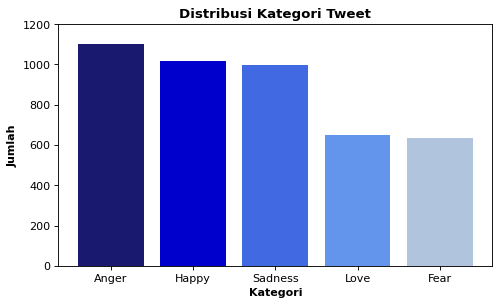

In [ ]:
height = data['label'].value_counts()
labels = ('Anger', 'Happy', 'Sadness', 'Love', 'Fear')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1200)
plt.title('Distribusi Kategori Tweet', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['midnightblue', 'mediumblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])
plt.xticks(y_pos, labels)
plt.show()

# 02 | Data Preprocessing


In [ ]:
import re

## 1 | Function Case Folding


In [ ]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

### Membuat Text menjadi Lowercase

In [ ]:
txt = data['tweet'].iloc[0]
text1 = txt
text1 = text1.lower()
print(txt,'\n')
print(text1)

Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL] 

soal jln jatibaru,polisi tdk bs gertak gubernur .emangny polisi tdk ikut pmbhasan? jgn berpolitik. pengaturan wilayah,hak gubernur. persoalan tn abang soal turun temurun.pelik.perlu kesabaran. [username] [username] [url]


### Menghilangkan URL

In [ ]:
text2 = re.sub(r'https?://\S+|www\.\S+', '', text1)
print(text2)

soal jln jatibaru,polisi tdk bs gertak gubernur .emangny polisi tdk ikut pmbhasan? jgn berpolitik. pengaturan wilayah,hak gubernur. persoalan tn abang soal turun temurun.pelik.perlu kesabaran. [username] [username] [url]


### Menghilangkan karakter angka

In [ ]:
text3 = re.sub(r'[-+]?[0-9]+', '', text2)
print(text3)

soal jln jatibaru,polisi tdk bs gertak gubernur .emangny polisi tdk ikut pmbhasan? jgn berpolitik. pengaturan wilayah,hak gubernur. persoalan tn abang soal turun temurun.pelik.perlu kesabaran. [username] [username] [url]


### Menghilangkan karakter khusus/tanda *baca* pada text

In [ ]:
text4 = re.sub(r"[^\w\s]", "", text3)
print(text4)

soal jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk ikut pmbhasan jgn berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url


### Menghilangkan whitespace

In [ ]:
text5 = text4.strip()
print(text5)

soal jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk ikut pmbhasan jgn berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url


## 2 | Word Normalization

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-04 10:55:54--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.008s  

2022-10-04 10:55:55 (10.2 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')
key_norm2 = pd.read_excel('kamus_singkatan.xlsx')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [ ]:
print(key_norm2.head())

   singkat     hasil
0   aamiin     amin 
1     adek     adik 
2     adlh   adalah 
3      aer      air 
4  aiskrim  es krim 


In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = ' '.join([key_norm2[key_norm2['singkat'] == word]['hasil'].values[0] if (key_norm2['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## 3 | Filtering (Stopword Removal)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['username', 'link']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['tweet'].iloc[0]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_words(normalize)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Normalize\t\t: ', normalize)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]
Case folding		:  soal jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk ikut pmbhasan jgn berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url
Normalize		:  soal jalan jatibarupolisi tidak bisa gertak gubernur emangny polisi tidak ikut pmbhasan jangan berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url
Stopword removal	:  jalan jatibarupolisi gertak gubernur emangny polisi pmbhasan berpolitik pengaturan wilayahhak gubernur tn abang turun temurunpelikperlu kesabaran url


## 4 | Stemming

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.2 MB/s 


In [ ]:
raw_sample = data['tweet'].iloc[0]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_words(normalize)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Normalize\t\t: ', normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]
Case folding		:  soal jln jatibarupolisi tdk bs gertak gubernur emangny polisi tdk ikut pmbhasan jgn berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url
Normalize		:  soal jalan jatibarupolisi tidak bisa gertak gubernur emangny polisi tidak ikut pmbhasan jangan berpolitik pengaturan wilayahhak gubernur persoalan tn abang soal turun temurunpelikperlu kesabaran username username url
Stopword removal	:  jalan jatibarupolisi gertak gubernur emangny polisi pmbhasan berpolitik pengaturan wilayahhak gubernur tn abang turun temurunpelikperlu kesabaran url
Stemming		:  jalan jatibarupolisi gertak gubernur emangny polisi pmbhasan politik atur wilayahhak gubernur tn abang turun temurunpelikperlu sa

## 5 | Text Preprocessing Pipeline

In [ ]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1min 45s, sys: 5.21 s, total: 1min 50s
Wall time: 1min 47s


In [ ]:
data

,label,tweet,clean_teks
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek lho kayak rasain sibuk jaga rasain sakit...
2,2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,2,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...
4396,3,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahu papa mejam mata tahan gejolak batin papa ...
4397,1,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit tetap calon wapresnya jokowi pilpres sal...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ...",depan lha iya coba lulus seni bisa tari kerja ...
4399,2,[USERNAME] dulu beneran ada mahasiswa Teknik U...,mahasiswa teknik ui tembak pacar pas sahur kuk...


In [ ]:
data

,label,tweet,clean_teks
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek lho kayaknya rasain sibuk jaga rasain sa...
2,2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,2,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman kemarin jam batalin tiket s...
...,...,...,...
4396,3,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahukah papa memejamkan matanya menahan gejola...
4397,1,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulitnya menetapkan calon wapresnya jokowi pil...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ...",depannya lha iya coba lulusan seni bisanya men...
4399,2,[USERNAME] dulu beneran ada mahasiswa Teknik U...,mahasiswa teknik ui menembak pacarnya pas sahu...


In [ ]:
data.to_csv('clean_data.csv')

# 03 | Feature Engineering

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['label']

## 1 | Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,__,_____,________,_________,_awayday,_bobotoh,_gue,_kngdaniel,_sabranglor,aa,...,zmn,zohri,zon,zona,zonasi,zonk,zonkies,zonknya,zuhri,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## 2 | Feature Selection (Chi Square)

In [ ]:
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 17636
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,1.022774
1,1.889492
2,1.013903
3,0.526608
4,1.151438
...,...
17631,0.571119
17632,0.808843
17633,1.560576
17634,0.842239


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,1.022774,__
1,1.889492,_____
2,1.013903,________
3,0.526608,_________
4,1.151438,_awayday
...,...,...
17631,0.571119,zonk
17632,0.808843,zonkies
17633,1.560576,zonknya
17634,0.842239,zuhri


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2687,244.977374,cinta
15644,228.492532,takut
14124,190.196360,sayang
14695,74.042487,seram
11208,64.398752,ngeri
...,...,...
4297,0.077956,dukung
10863,0.074844,nama
1278,0.073762,be
5860,0.042224,hormat


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['acara',
 'adipati',
 'aduh',
 'agama',
 'agus',
 'aim',
 'akhri',
 'akumencintamu',
 'akun',
 'ala',
 'alasan',
 'album',
 'alhamdulillah',
 'alhasil',
 'all',
 'allaah',
 'allah',
 'aman',
 'amin',
 'amp',
 'anakanaknya',
 'aneh',
 'angan',
 'anies',
 'anjay',
 'anjing',
 'anjir',
 'anniv',
 'anniversary',
 'anugerah',
 'anxiety',
 'apain',
 'arguement',
 'army',
 'asik',
 'askmf',
 'asli',
 'asyik',
 'awas',
 'awet',
 'ayah',
 'ayo',
 'ayu',
 'baby',
 'baca',
 'bacot',
 'badan',
 'bagiku',
 'bahagia',
 'bahagiaitu',
 'bahagialah',
 'bahaya',
 'baikkanlah',
 'bait',
 'balas',
 'banci',
 'bandit',
 'bandung',
 'bangsat',
 'bangun',
 'bangunan',
 'banteng',
 'barokah',
 'bat',
 'bau',
 'bawel',
 'bayang',
 'bayangbayangnya',
 'bayanginnya',
 'bayangkan',
 'bayar',
 'bca',
 'bela',
 'belaian',
 'belok',
 'benda',
 'benerbener',
 'berani',
 'beraniin',
 'berat',
 'berbagi',
 'berbunga',
 'berduka',
 'berharap',
 'berhenti',
 'berhubungan',
 'beritahu',
 'berkah',
 'berkelana',
 'berlind

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'gubernur': 5350,
 'polisi': 13015,
 'url': 17001,
 'haid': 5472,
 'pulang': 13267,
 'malam': 8976,
 'orang': 11727,
 'korban': 8082,
 'takut': 15644,
 'dibela': 3277,
 'temanteman': 15882,
 'berbagi': 1465,
 'indah': 6111,
 'gub': 5347,
 'otaknya': 11767,
 'lancar': 8431,
 'sekian': 14392,
 'baca': 911,
 'aneh': 514,
 'sih': 14920,
 'sumpah': 15436,
 'lebay': 8543,
 'aduh': 126,
 'teman': 15873,
 'tuh': 16704,
 'berat': 1461,
 'pakai': 11858,
 'hujan': 5915,
 'teriak': 16063,
 'menuduh': 10198,
 'lebaran': 8539,
 'dilema': 3645,
 'dirumah': 3872,
 'min': 10481,
 'rakyat': 13419,
 'indonesia': 6129,
 'lihat': 8679,
 'presiden': 13122,
 'lari': 8482,
 'bersyukur': 1817,
 'mendoakan': 9756,
 'sulit': 15420,
 'menerima': 9801,
 'langsung': 8452,
 'utuh': 17046,
 'maling': 8992,
 'si': 14884,
 'anjing': 565,
 'hati': 5615,
 'ku': 8172,
 'komen': 7987,
 'netizen': 11023,
 'habis': 5413,
 'pikir': 12863,
 'macem': 8877,
 'pelecehan': 12175,
 'seksual': 14416,
 'pelaku': 12154,
 'jahat': 641

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,acara,adipati,aduh,agama,agus,aim,akhri,akumencintamu,akun,ala,...,wkwkwk,workshopcerpenkompas,yaa,yaallahsmoga,yaelah,yahudi,yoona,yoongiii,yu,yuta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 04 | Modelling (Machine Learning)

In [ ]:
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning.
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=0)

In [ ]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# 04.1 | Modelling (Transfer Learning)

## 1 | Data Preprocessing


In [ ]:
import re

In [ ]:
data2 = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [ ]:
data2

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [ ]:
data2["label"] = data2["label"].astype('category')
data2["label"] = data2["label"].cat.codes
data2

,label,tweet
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,2,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,3,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,1,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,2,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [ ]:
raw_data = data2.copy()

## 2 | Function Case Folding


In [ ]:
def casefolding2(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [ ]:
%time data2['tweet'] = data2['tweet'].apply(casefolding2)

CPU times: user 77.8 ms, sys: 0 ns, total: 77.8 ms
Wall time: 77.6 ms


In [ ]:
data2.head()

,label,tweet
0,0,soal jln jatibarupolisi tdk bs gertak gubernur...
1,0,sesama cewe lho kayaknya harusnya bisa lebih r...
2,2,kepingin gudeg mbarek bu hj amad foto dari goo...
3,0,jln jatibarubagian dari wilayah tn abangpengat...
4,2,sharing pengalaman aja kemarin jam batalin ti...


In [ ]:
cols = data2.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols


['tweet', 'label']

In [ ]:
data2 = data2[cols]
data2

,tweet,label
0,soal jln jatibarupolisi tdk bs gertak gubernur...,0
1,sesama cewe lho kayaknya harusnya bisa lebih r...,0
2,kepingin gudeg mbarek bu hj amad foto dari goo...,2
3,jln jatibarubagian dari wilayah tn abangpengat...,0
4,sharing pengalaman aja kemarin jam batalin ti...,2
...,...,...
4396,tahukah kamu bahwa saat itu papa memejamkan ma...,3
4397,sulitnya menetapkan calon wapresnya jokowi di ...,1
4398,masa depannya nggak jelas lha iya gimana mau j...,0
4399,username dulu beneran ada mahasiswa teknik ui ...,2


## 3 | Train & Test Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data2, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)

df_train.shape, df_test.shape, df_val.shape

((3520, 2), (441, 2), (440, 2))

## 4 | Load Tokenizer

In [ ]:
PRE_TRAINED_MODEL2 = 'indolem/indobertweet-base-uncased'
PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'  # https://huggingface.co/indobenchmark/indobert-base-p2

In [ ]:
!pip install transformers
from transformers import BertTokenizer, AutoTokenizer, AutoModel
bert_tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL2)
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.1 MB/s 
     |████████████████████████████████| 6.6 MB 37.3 MB/s 
     |████████████████████████████████| 163 kB 53.8 MB/s 


Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# Lihat vocabulary dari pre-trained model yang telah di load sebelumnya
vocabulary = bert_tokenizer.get_vocab()
vocabulary2 = tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))
print('Panjang vocabulary2:', len(vocabulary2))

Panjang vocabulary: 31923
Panjang vocabulary2: 30521


## 5 | Input Formating
Teks harus dipecah menjadi token sebelum dimasukkan ke BERT, kemudian token tersebut harus dipetakan ke indeks pada kosakata tokenizer yang telah di load sebelumnya. Tokenisasi harus dilakukan oleh tokenizer yang disertakan dengan BERT.

In [ ]:
id_data = 5

In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    data2.tweet[id_data],             # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 50,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Kalimat\t\t:', raw_data.tweet[id_data])                                           # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.
Tokenizer	: ['[CLS]', 'dari', 'sekian', 'banyak', 'thread', 'yang', 'aku', 'baca', 'thread', 'ini', 'paling', 'aneh', 'sih', 'dalam', 'penulisan', 'sumpah', 'aneh', 'bgt', 'mau', 'ngatain', 'lebay', 'aja', 'segala', 'bikin', 'thread', 'hadeh', 'aku', 'juga', 'ga', 'jago', 'nulis', 'tapi', 'tulisan', 'aku', 'ga', 'seber', '##anta', '##kan', 'thread', 'mbaknya', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [3, 1542, 9101, 1814, 6052, 1497, 2254, 2472, 6052, 1540, 2323, 5991, 6041, 1558, 8018, 10485, 5991, 6048, 2882, 12016, 16496, 6380, 3157, 9929, 6052, 12554, 2254, 1614, 5311, 11447, 26519, 2167, 3876, 2254, 5311, 18261, 19029, 1493, 6052, 19279, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 

## 6 | Memilih Panjang Sequence (max_length)

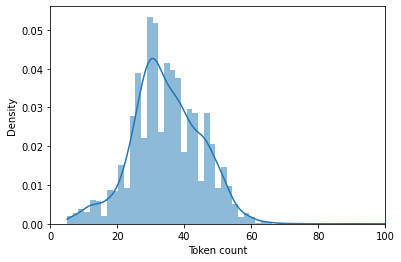

In [ ]:
import seaborn as sns
token_lens = []

for txt in data2.tweet:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 70

## 7 | Input Formatting pada Data Latih & Uji

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, 
# menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
import tensorflow as tf
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data2.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 8
BATCH_SIZE = 32
LEARNING_RATE = 5e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(df_train).batch(BATCH_SIZE)
test_encoded = encode(df_test).batch(BATCH_SIZE)
val_encoded = encode(df_val).batch(BATCH_SIZE)

## 8 | Load Pre-Trained Model

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFBertForSequenceClassification

# Load model

bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL2, num_labels=5, from_pt=True)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

## 9 | Fine Tuning

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/8
138/138 [==============================] - 107s 624ms/step - loss: 0.8878 - accuracy: 0.6676 - val_loss: 0.4387 - val_accuracy: 0.8612
Epoch 2/8
138/138 [==============================] - 86s 623ms/step - loss: 0.4463 - accuracy: 0.8453 - val_loss: 0.1854 - val_accuracy: 0.9450
Epoch 3/8
138/138 [==============================] - 86s 623ms/step - loss: 0.2436 - accuracy: 0.9259 - val_loss: 0.1157 - val_accuracy: 0.9639
Epoch 4/8
138/138 [==============================] - 86s 623ms/step - loss: 0.1937 - accuracy: 0.9375 - val_loss: 0.0659 - val_accuracy: 0.9809
Epoch 5/8
138/138 [==============================] - 86s 625ms/step - loss: 0.0780 - accuracy: 0.9743 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 6/8
138/138 [==============================] - 86s 622ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0166 - val_accuracy: 0.9964
Epoch 7/8
138/138 [==============================] - 86s 622ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0064 - val_accuracy

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

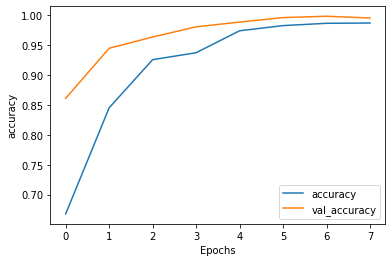

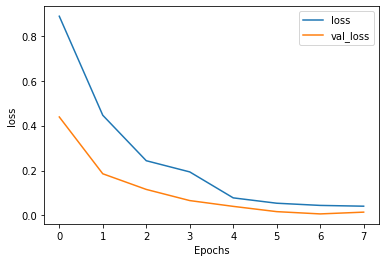

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.667576 	   0.887768 	   0.861168 	   0.438719
       2   0.845262 	   0.446262 	   0.945013 	   0.185415
       3   0.925926 	   0.243622 	   0.963872 	   0.115664
       4   0.937514 	   0.193727 	   0.980913 	   0.065914
       5   0.974324 	   0.077991 	   0.988866 	   0.040084
       6   0.982958 	   0.054123 	   0.996364 	   0.016609
       7   0.986821 	   0.044360 	   0.998637 	   0.006434
       8   0.987276 	   0.040844 	   0.995683 	   0.014340


In [ ]:
bert_model.save_weights('bert-model.h5')

# 05 | Model Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 538
Jumlah prediksi salah	: 343
Akurasi pengujian	: 61.06696935300795 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[192   4  17   1  17]
 [ 29  52  23   1  12]
 [ 48   1 127   0  16]
 [  7   0  34  56  36]
 [ 61   1  32   3 111]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.83      0.68       231
           1       0.90      0.44      0.59       117
           2       0.55      0.66      0.60       192
           3       0.92      0.42      0.58       133
           4       0.58      0.53      0.55       208

    accuracy                           0.61       881
   macro avg       0.70      0.58      0.60       881
weighted avg       0.66      0.61      0.60       881



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.6015891  0.61748014 0.63904654 0.61861521 0.65493757 0.64358683
 0.64131669 0.60272418 0.61293984 0.59477866] 

Rata-rata akurasi pada cross validation: 0.6227014755959137


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

138/138 [==============================] - 23s 164ms/step - loss: 0.0143 - accuracy: 0.9957
Test Accuracy: 0.9956827759742737


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
predicted_raw['logits']

array([[ 7.016696  , -2.3100998 , -2.0453055 , -1.8911697 , -1.0159872 ],
       [ 7.1423874 , -2.0838099 , -2.0226774 , -1.8109581 , -1.3063842 ],
       [-2.9895341 , -2.3703916 ,  7.013127  , -0.9827857 , -1.078539  ],
       ...,
       [ 7.2024565 , -1.7934953 , -2.2092078 , -1.6769462 , -1.5627497 ],
       [-2.636736  , -2.6098628 ,  6.698148  , -1.1039959 , -0.80600435],
       [-2.6539907 ,  0.40382117, -2.5681028 , -1.4616163 ,  5.881896  ]],
      dtype=float32)

In [ ]:
test_encoded

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 70), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 70), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 70), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(data['label'])

In [ ]:
y_pred

array([0, 0, 2, ..., 0, 2, 4])

In [ ]:
y_true

array([0, 0, 2, ..., 0, 2, 4], dtype=int8)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.995682799363781

In [ ]:
confusion_matrix(y_true, y_pred)

array([[1097,    1,    2,    0,    1],
       [   0,  648,    0,    0,    1],
       [   0,    0, 1008,    9,    0],
       [   0,    0,    1,  636,    0],
       [   0,    1,    1,    2,  993]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1101
           1       1.00      1.00      1.00       649
           2       1.00      0.99      0.99      1017
           3       0.98      1.00      0.99       637
           4       1.00      1.00      1.00       997

    accuracy                           1.00      4401
   macro avg       0.99      1.00      1.00      4401
weighted avg       1.00      1.00      1.00      4401



# 06 | Predict Transfer Learning Model

In [ ]:
# Load hasil fine-tuning
bert_load_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL2, num_labels=5, from_pt=True)
bert_load_model.load_weights('bert-model.h5')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Sample text
input_text = 'kemarin aku menangis karena hasil ujianku kurang baik' #@param {type:"string"}

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
bert_predict = bert_load_model(input_text_tokenized)          # Lakukan prediksi
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)         # Softmax function untuk mendapatkan hasil klasifikasi

In [ ]:
tweet_labels = ['Angry', 'Fear', 'Happiness', 'Love', 'Sadness']

label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [ ]:
print(input_text, ':', '\33[0;36m',tweet_labels[label[0]])

kemarin aku menangis karena hasil ujianku kurang baik :  Sadness


In [ ]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
#@title | Predict Machine Learning Model
input_text = "kemarin aku menangis karena hasil ujianku kurang baik" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  tweet = 'Angry'
elif (result==1):
  tweet = 'Fear'
elif (result==2):
  tweet = 'Happiness'
elif (result==3):
  tweet = 'Love'
else:
  tweet = 'Sadness'

print('Hasil prediksi', input_text, ' adalah\33[0;36m', tweet)

Hasil Text Preprocessing : kemarin menang hasil uji
Hasil prediksi kemarin aku menangis karena hasil ujianku kurang baik  adalah Happiness


# 07 | Kesimpulan

Dari hasil praktik untuk mengklasifikasi dan mendeteksi emosi melalui suatu teks yang diungkapkan seseorang melalui media sosial Twitter, yang dilakukan dengan membandingkan algoritma Machine Learning dan Transfer Learning didapat beberapa hal :

* Hasil akurasi model machine learning dengan algoritma Naive Bayes mendapatkan nilai 61% untuk akurasi prediksi pada pengujiannya.
* Hasil akurasi metode transfer learning dengan model pretrained BERTweet  mendapat nilai 99% untuk akurasi prediksi pada pengujiannya.
* Dari hasil akurasi tersebut kemudian dilakukan pengujian prediksi dengan data baru dan didapat hasil uji prediksi dengan Metode Transfer Learning menampilkan hasil lebih baik dan sesuai dengan yang diharapkan dari input yang dimasukkan.
